# And

In [1]:
import cirq
import numpy as np
import cirq_qubitization
import cirq_qubitization.cirq_infra.testing as cq_testing
from cirq_qubitization.jupyter_tools import display_gate_and_compilation, show_bloq
from typing import *

## `And`
A two-bit and operation.

#### Parameters
 - `cv1`: Whether the first bit is a positive control.
 - `cv2`: Whether the second bit is a positive control. 

Registers:
 - control: A two-bit control register.
 - (right) target: The output bit.

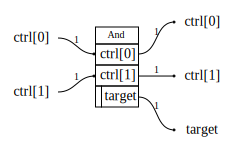

In [2]:
from cirq_qubitization.bloq_algos.and_bloq import And

bloq = And()
show_bloq(bloq)

### Test `adjoint`

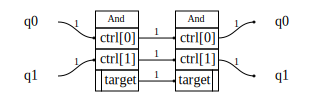

In [3]:
from cirq_qubitization.quantum_graph.composite_bloq import CompositeBloqBuilder, FancyRegisters

bb = CompositeBloqBuilder()
q0 = bb.add_register('q0', 1)
q1 = bb.add_register('q1', 1)
qs, trg = bb.add(And(), ctrl=[q0, q1])
(qs,) = bb.add(And(adjoint=True), ctrl=qs, target=trg)
cbloq = bb.finalize(q0=qs[0], q1=qs[1])

show_bloq(cbloq)

In [4]:
import numpy as np

mat = cbloq.tensor_contract()
np.testing.assert_allclose(np.eye(4), mat)
mat

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

## Apply Classical

In [5]:
ctrl = np.array([[1], [1]])

And().apply_classical(ctrl=ctrl)

(array([[1],
        [1]]),
 array([1]))

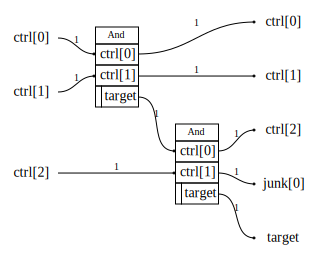

In [6]:
from cirq_qubitization.bloq_algos.and_bloq import MultiAnd
bloq = MultiAnd((1,1,1))
show_bloq(bloq.decompose_bloq())

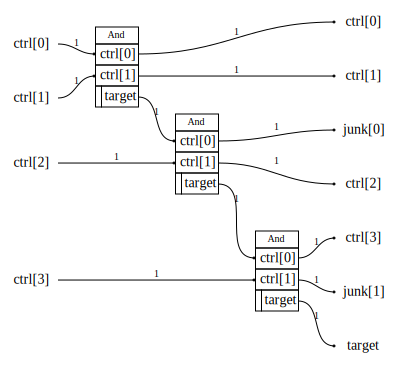

In [7]:
from cirq_qubitization.bloq_algos.and_bloq import MultiAnd
bloq = MultiAnd((1,1,1,1))
show_bloq(bloq.decompose_bloq())

In [8]:
ctrl = [1,1,1,1]
ctrl = np.array(ctrl)
ctrl = ctrl[:, np.newaxis]
bloq.apply_classical(ctrl=ctrl)

(array([[1],
        [1],
        [1],
        [1]]),
 array([0., 0.]),
 array([1]))

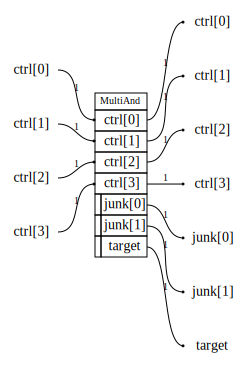

In [9]:
bloq = MultiAnd((1,1,1,1))
show_bloq(bloq)

In [10]:
from cirq_qubitization.quantum_graph.classical_sim import _apply_classical_cbloq

ctrl = [1,1,0,1]
ctrl = np.array(ctrl)
ctrl = ctrl[:, np.newaxis]


cbloq = bloq.decompose_bloq()
data = {'ctrl': ctrl}

_apply_classical_cbloq(cbloq.registers, data, cbloq._binst_graph)

Applying And(cv1=1, cv2=1, adjoint=False)<0>
   ctrl [[1.]
 [1.]]
--
   [[1.]
 [1.]]
   [1]
Applying And(cv1=1, cv2=1, adjoint=False)<1>
   ctrl [[1.]
 [0.]]
--
   [[1.]
 [0.]]
   [0]
Applying And(cv1=1, cv2=1, adjoint=False)<2>
   ctrl [[0.]
 [1.]]
--
   [[0.]
 [1.]]
   [0]


{'ctrl': array([[1.],
        [1.],
        [0.],
        [0.]]),
 'junk': array([[1.],
        [1.]]),
 'target': array([0.])}